# PAGE VIEWS TIME SERIES VISUALIZER

## TASKS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mainpath = "/Users/ezequielpolacco/Downloads/"
filename = "fcc-forum-pageviews.csv"
fullpath = mainpath + "/" + filename

In [25]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(fullpath, parse_dates=["date"], index_col="date")

In [26]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [27]:
# Clean the data by filtering out days when the page views were 
#in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df.loc[(df["value"] >= df["value"].quantile(0.025))
        & (df["value"] <= df["value"].quantile(0.975))]

In [28]:
df.shape

(1238, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

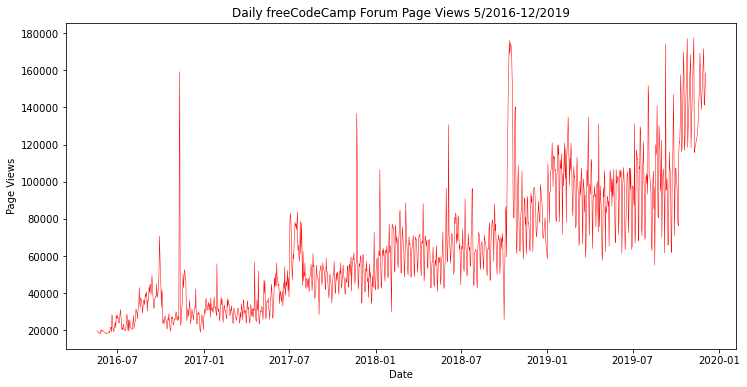

In [40]:
# Draw a line chart similar. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
# The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, df["value"], "r", linewidth=0.5)


ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

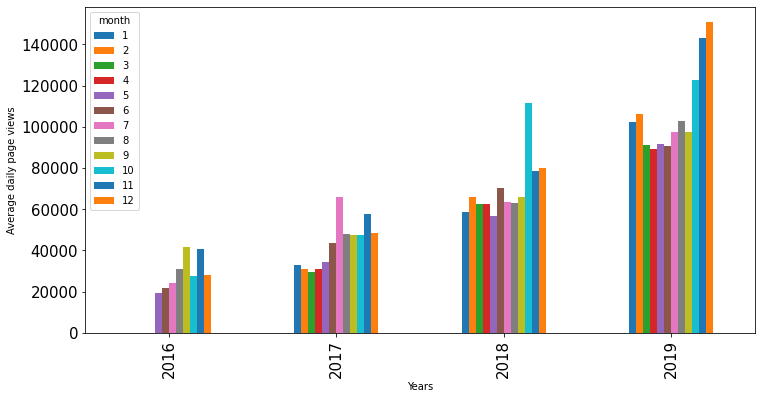

In [48]:
#Create a draw_bar_plot. 
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of "Months". 
#On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

# Copy and modify data for monthly bar plot
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

# Draw bar plot
fig=df_bar.plot.bar(legend=True, figsize=(12,6), xlabel= "Years" , ylabel= "Average daily page views").figure
plt.legend= (["January", "February", "March", "April", "May", "June", "July", 
             "August", "September", "October", "November", "December"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show

Text(0, 0.5, 'Page views')

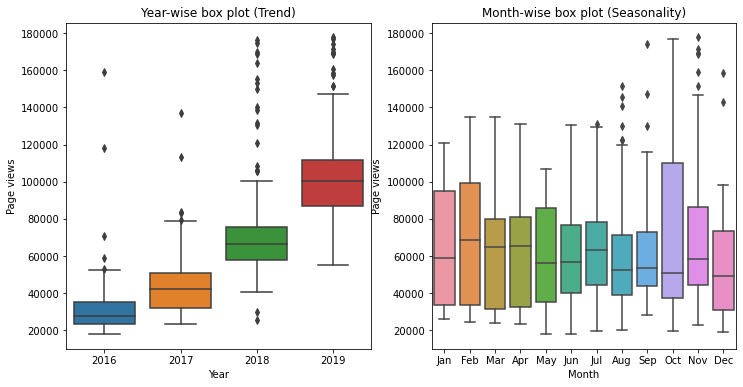

In [53]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0]= sns.boxplot(x=df_box["year"], y=df_box["value"], ax=axes[0])
axes[1]= sns.boxplot(x=df_box["month"], y=df_box["value"], ax=axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page views")

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page views")


